# DataScience Hackathon

## NETWORK ANAMOLY DETECTION

##### BUSINESS PROBLEM:

Your task to build network intrusion detection system to detect anomalies and attacks in the
Network. There are two problems.
1. Binomial Classification: Activity is normal or attack
2. Multinomial classification: Activity is normal or DOS or PROBE or R2L or U2R
Please note that, currently the dependent variable (target variable) is not defined explicitly.
However, you can use attack variable to define the target variable as required.

###### DATA AVAILABILITY:
This data is KDDCUP’99 data set, which is widely used as one of the few publicly available data sets
for network-based anomaly detection systems.


### Solution
This business problem is modeled as binomial classification.

Binomial Classification: Activity is normal or attack

Algorithms - Logistic Regression,Random Forest,LGBM,XGM are used in developing the model

In [187]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [188]:
# Load the datasets

train_df = pd.read_csv('C:\\Users\\satish\\Desktop\\TM\\train.txt')
test_df  = pd.read_csv('C:\\Users\\satish\\Desktop\\TM\\test.txt')

In [189]:
# make copy of the datasets

train = train_df.copy()
test  = test_df.copy()

### Exploratatory Data Analysis

In [190]:
# Display the dimensions of the data sets

print("train data set dimensions:",train.shape)
print("test data set dimensions:",test.shape)

train data set dimensions: (125972, 43)
test data set dimensions: (22543, 43)


In [191]:
# Display the header of the train data set

train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17.1,0.03,0.17.2,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [192]:
# Display the header of the test data set

test.head()

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [193]:
train.columns = ["duration",
"protocol_type",
"service",
"flag",
"src_bytes",
"dst_bytes",
"land",
"wrong_fragment",
"urgent",
"hot",
"num_failed_logins",
"logged_in",
"num_compromised",
"root_shell",
"su_attempted",
"num_root",
"num_file_creations",
"num_shells",
"num_access_files",
"num_outbound_cmds",
"is_host_login",
"is_guest_login",
"count",
"srv_count",
"serror_rate", 
"srv_serror_rate",
"rerror_rate",
"srv_rerror_rate",
"same_srv_rate", 
"diff_srv_rate", 
"srv_diff_host_rate",
"dst_host_count",
"dst_host_srv_count",
"dst_host_same_srv_rate",
"dst_host_diff_srv_rate",
"dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate",
"dst_host_serror_rate",
"dst_host_srv_serror_rate",
"dst_host_rerror_rate",
"dst_host_srv_rerror_rate",
"attack", 
"last_flag"]

In [194]:
test.columns = ["duration",
"protocol_type",
"service",
"flag",
"src_bytes",
"dst_bytes",
"land",
"wrong_fragment",
"urgent",
"hot",
"num_failed_logins",
"logged_in",
"num_compromised",
"root_shell",
"su_attempted",
"num_root",
"num_file_creations",
"num_shells",
"num_access_files",
"num_outbound_cmds",
"is_host_login",
"is_guest_login",
"count",
"srv_count",
"serror_rate", 
"srv_serror_rate",
"rerror_rate",
"srv_rerror_rate",
"same_srv_rate", 
"diff_srv_rate", 
"srv_diff_host_rate",
"dst_host_count",
"dst_host_srv_count",
"dst_host_same_srv_rate",
"dst_host_diff_srv_rate",
"dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate",
"dst_host_serror_rate",
"dst_host_srv_serror_rate",
"dst_host_rerror_rate",
"dst_host_srv_rerror_rate",
"attack", 
"last_flag"]

In [195]:
# Display the information of the TRAIN data set

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
duration                       125972 non-null int64
protocol_type                  125972 non-null object
service                        125972 non-null object
flag                           125972 non-null object
src_bytes                      125972 non-null int64
dst_bytes                      125972 non-null int64
land                           125972 non-null int64
wrong_fragment                 125972 non-null int64
urgent                         125972 non-null int64
hot                            125972 non-null int64
num_failed_logins              125972 non-null int64
logged_in                      125972 non-null int64
num_compromised                125972 non-null int64
root_shell                     125972 non-null int64
su_attempted                   125972 non-null int64
num_root                       125972 non-null int64
num_file_creations             125972 

In [196]:
# Display the information of the TEST data set

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
duration                       22543 non-null int64
protocol_type                  22543 non-null object
service                        22543 non-null object
flag                           22543 non-null object
src_bytes                      22543 non-null int64
dst_bytes                      22543 non-null int64
land                           22543 non-null int64
wrong_fragment                 22543 non-null int64
urgent                         22543 non-null int64
hot                            22543 non-null int64
num_failed_logins              22543 non-null int64
logged_in                      22543 non-null int64
num_compromised                22543 non-null int64
root_shell                     22543 non-null int64
su_attempted                   22543 non-null int64
num_root                       22543 non-null int64
num_file_creations             22543 non-null int64
num_

In [197]:
# Display the header of the train data set

train.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.0,0.00,0.0,0.00,0.0,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.0,0.72,0.0,0.01,0.0,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20
125971,0,tcp,ftp_data,SF,151,0,0,0,0,0,...,0.30,0.03,0.30,0.0,0.00,0.0,0.00,0.0,normal,21


In [198]:
# Display the header of the TEST data set

test.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
22538,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22539,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22541,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21
22542,0,tcp,sunrpc,REJ,0,0,0,0,0,0,...,0.08,0.03,0.00,0.00,0.00,0.0,0.44,1.00,mscan,14


In [199]:
# [TRAIN DATA SET] seperate out the Categorical and Numerical features

numerical_feature   = train.dtypes[train.dtypes!= 'object'].index
categorical_feature = train.dtypes[train.dtypes== 'object'].index

print ("There are {} numeric and {} categorical columns in train data"
       .format(numerical_feature.shape[0],categorical_feature.shape[0]))

There are 39 numeric and 4 categorical columns in train data


In [200]:
numerical_feature

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'last_flag'],
      dtype='object')

In [201]:
categorical_feature

Index(['protocol_type', 'service', 'flag', 'attack'], dtype='object')

In [202]:
#verifying the Target variable

train["attack"].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [203]:
train['attack'].value_counts()

normal             67342
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64

In [204]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [205]:
d ={'normal':['normal'],
'dos':['neptune','smurf','back','teardrop','pod','land','apache2','udpstorm','processtable','worm'],
'probe':['satan','ipsweep','portsweep','nmap','mscan','saint'],
'r2l':['guess_passwd','ftp_write','imap','phf','multihop','warezmaster','warezclient','spy','xlock','xsnoop','snmpguess','snmpgetattak','httptunnel','sendmail','named'],
'u2r':['buffer_overflow','rootkit','loadmodule','perl','sqlattack','xterm','ps']}

In [206]:
d1 = {k: oldk for oldk, oldv in d.items() for k in oldv}

In [207]:
print (d1)

{'normal': 'normal', 'neptune': 'dos', 'smurf': 'dos', 'back': 'dos', 'teardrop': 'dos', 'pod': 'dos', 'land': 'dos', 'apache2': 'dos', 'udpstorm': 'dos', 'processtable': 'dos', 'worm': 'dos', 'satan': 'probe', 'ipsweep': 'probe', 'portsweep': 'probe', 'nmap': 'probe', 'mscan': 'probe', 'saint': 'probe', 'guess_passwd': 'r2l', 'ftp_write': 'r2l', 'imap': 'r2l', 'phf': 'r2l', 'multihop': 'r2l', 'warezmaster': 'r2l', 'warezclient': 'r2l', 'spy': 'r2l', 'xlock': 'r2l', 'xsnoop': 'r2l', 'snmpguess': 'r2l', 'snmpgetattak': 'r2l', 'httptunnel': 'r2l', 'sendmail': 'r2l', 'named': 'r2l', 'buffer_overflow': 'u2r', 'rootkit': 'u2r', 'loadmodule': 'u2r', 'perl': 'u2r', 'sqlattack': 'u2r', 'xterm': 'u2r', 'ps': 'u2r'}


In [208]:
# [TRAINING DATA SET] Target Label - attack value converted to 5 level values

train['attack'] = train['attack'].map(d1)

In [209]:
# [TEST DATA SET] Target Label - attack value converted to 5 level values

test['attack'] = test['attack'].map(d1)

In [210]:
train['attack'].value_counts()

normal    67342
dos       45927
probe     11656
r2l         995
u2r          52
Name: attack, dtype: int64

In [211]:
test['attack'].value_counts()

normal    9711
dos       7166
r2l       2707
probe     2421
u2r         67
Name: attack, dtype: int64

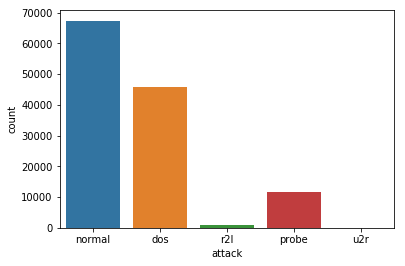

In [212]:
sns.countplot(x='attack',data=train)

In [213]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,dos,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,dos,21


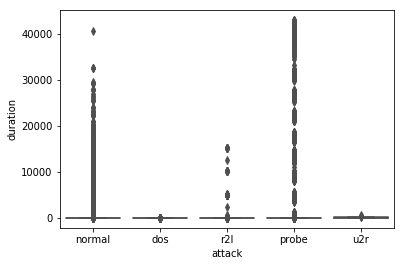

In [214]:
sns.boxplot(x="attack", y="duration", data=train,palette='rainbow')

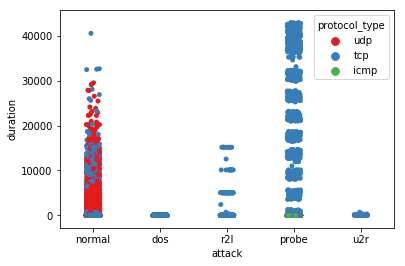

In [215]:
sns.stripplot(x="attack", y="duration", data=train,jitter=True,hue='protocol_type',palette='Set1')

### TCP connections are more prone to attacks,but TCP is most widely used protocl

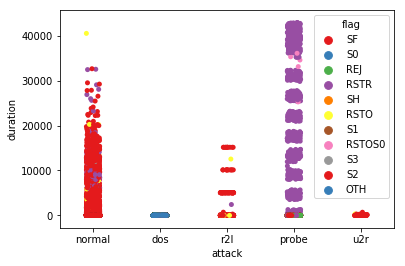

In [216]:
sns.stripplot(x="attack", y="duration", data=train,jitter=True,hue='flag',palette='Set1')

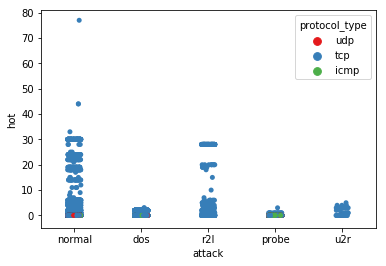

In [217]:
sns.stripplot(x="attack", y="hot", data=train,jitter=True,hue='protocol_type',palette='Set1')

#### Missing Values 

In [218]:
# [TRAIN DataSet] Missing values - checking

train.isnull().sum().sort_values(ascending=False)

last_flag                      0
num_failed_logins              0
num_access_files               0
num_shells                     0
num_file_creations             0
num_root                       0
su_attempted                   0
root_shell                     0
num_compromised                0
logged_in                      0
hot                            0
is_host_login                  0
urgent                         0
wrong_fragment                 0
land                           0
dst_bytes                      0
src_bytes                      0
flag                           0
service                        0
protocol_type                  0
num_outbound_cmds              0
is_guest_login                 0
attack                         0
dst_host_srv_count             0
dst_host_srv_rerror_rate       0
dst_host_rerror_rate           0
dst_host_srv_serror_rate       0
dst_host_serror_rate           0
dst_host_srv_diff_host_rate    0
dst_host_same_src_port_rate    0
dst_host_d

In [219]:
# [TEST DataSet] Missing values - checking

test.isnull().sum().sort_values(ascending=False)

attack                         471
is_host_login                    0
num_outbound_cmds                0
num_access_files                 0
num_shells                       0
num_file_creations               0
num_root                         0
su_attempted                     0
root_shell                       0
num_compromised                  0
logged_in                        0
last_flag                        0
hot                              0
urgent                           0
wrong_fragment                   0
land                             0
dst_bytes                        0
src_bytes                        0
flag                             0
service                          0
protocol_type                    0
num_failed_logins                0
is_guest_login                   0
count                            0
srv_count                        0
dst_host_srv_rerror_rate         0
dst_host_rerror_rate             0
dst_host_srv_serror_rate         0
dst_host_serror_rate

### Categorical Variable - Transformation

In [220]:
#[TRAIN DataSet] Display of the categorical features
categorical_feature.tolist()

['protocol_type', 'service', 'flag', 'attack']

In [221]:
train.protocol_type.value_counts()

tcp     102688
udp      14993
icmp      8291
Name: protocol_type, dtype: int64

In [222]:
test.protocol_type.value_counts()

tcp     18879
udp      2621
icmp     1043
Name: protocol_type, dtype: int64

In [223]:
train.flag.value_counts()

SF        74944
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: flag, dtype: int64

In [224]:
test.flag.value_counts()

SF        14875
REJ        3849
S0         2013
RSTO        773
RSTR        669
S3          249
SH           73
S1           21
S2           15
OTH           4
RSTOS0        2
Name: flag, dtype: int64

In [225]:
train.attack.value_counts()

normal    67342
dos       45927
probe     11656
r2l         995
u2r          52
Name: attack, dtype: int64

In [226]:
train['attack']=train['attack'].apply(lambda x: 'normal' if x=='normal' else 'attack')

In [227]:
train.attack.value_counts()

normal    67342
attack    58630
Name: attack, dtype: int64

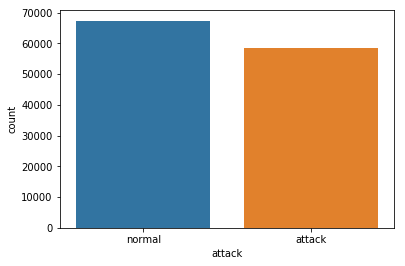

In [228]:
sns.countplot(x='attack',data=train)

In [229]:
##### Converting target variable to 0 and 1

In [230]:
train['attack']=train['attack'].apply(lambda x: 0 if x=='normal' else 1)

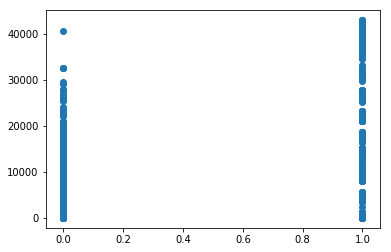

In [231]:
plt.scatter(train['attack'], train['duration'], marker='o');

In [232]:
train.duration.value_counts()

0        115954
1          1989
2           843
3           557
4           351
5           298
27          197
6           193
28          181
7           127
10          124
8            98
12           96
9            95
30           82
23           82
15           81
11           78
31           76
21           70
29           70
20           68
22           66
25           64
26           57
14           54
13           53
24           50
16           45
32           38
          ...  
3305          1
5290          1
42108         1
3049          1
21410         1
872           1
9004          1
808           1
13998         1
30438         1
12013         1
1832          1
8621          1
2472          1
14702         1
20771         1
16673         1
233           1
26788         1
4203          1
8237          1
4073          1
3945          1
1896          1
40763         1
38714         1
10028         1
7979          1
5930          1
2015          1
Name: duration, Length: 

#### observation - many rows with duration - zero ,seems wrong data something?

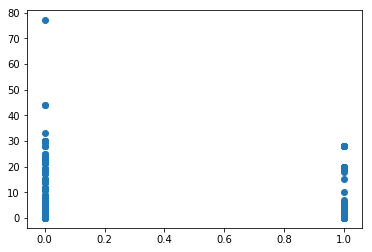

In [233]:
plt.scatter(train['attack'], train['hot'], marker='o');

In [234]:
train.attack.value_counts()

0    67342
1    58630
Name: attack, dtype: int64

### Feature engineering

In [235]:
#Src_bytes
#Dst_bytes

# new feature - total_bytes

#[TRAIN DataSet]
train['total_bytes'] = train['src_bytes']+train['dst_bytes']

# [TEST DataSet]
test['total_bytes'] = test['src_bytes']+test['dst_bytes']

#### One-Hot encoding of categorical features

In [236]:
# [Training DATA set ] One-Hot encoding of categorical features
train = pd.get_dummies(train)

#### PCA

In [237]:
df = train.copy()

In [238]:
df.shape

(125972, 125)

In [239]:
df.drop('attack',axis=1,inplace = True)

In [240]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [241]:
pc = pd.DataFrame(pca.components_,columns=df.columns,index = ['PC-1','PC-2'])

In [242]:
pc.head().transpose()

,PC-1,PC-2
duration,2.289151e-05,9.517592e-08
src_bytes,5.874572e-01,-5.670632e-01
dst_bytes,1.973626e-01,7.922845e-01
land,-2.020323e-13,-4.347320e-14
wrong_fragment,-2.304658e-11,-5.017819e-12
urgent,9.036975e-14,7.842417e-13
hot,2.717325e-11,-2.069841e-10
num_failed_logins,1.757674e-13,5.402802e-12
logged_in,-2.334880e-10,-1.204316e-10
num_compromised,1.242784e-09,6.013008e-09


In [243]:
print(pca.explained_variance_)

[8.05077355e+13 2.07654818e+13]


In [244]:
pc = pd.DataFrame(pca.components_,columns=df.columns,index = ['PC-1','PC-2']).abs().sum(axis=0)

In [245]:
pc.sort_values(ascending=False)

src_bytes                      1.154520e+00
total_bytes                    1.010041e+00
dst_bytes                      9.896470e-01
duration                       2.298669e-05
dst_host_count                 1.501137e-07
dst_host_srv_count             1.176726e-07
count                          1.018652e-07
srv_count                      3.205631e-08
last_flag                      1.037090e-08
num_root                       7.373631e-09
num_compromised                7.255792e-09
flag_RSTR                      1.002659e-09
flag_RSTOS0                    1.001616e-09
rerror_rate                    8.964898e-10
dst_host_srv_rerror_rate       8.959912e-10
srv_rerror_rate                8.957516e-10
dst_host_same_src_port_rate    8.937807e-10
dst_host_rerror_rate           8.833679e-10
service_other                  5.939115e-10
flag_SF                        5.549863e-10
dst_host_diff_srv_rate         5.134783e-10
dst_host_same_srv_rate         4.988487e-10
same_srv_rate                  4

In [246]:
#[TEST DATA SET] - Removing the attack variable as its the LABEL of the Model to predict

test.drop('attack', axis = 1,inplace=True)

In [247]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
duration                       22543 non-null int64
protocol_type                  22543 non-null object
service                        22543 non-null object
flag                           22543 non-null object
src_bytes                      22543 non-null int64
dst_bytes                      22543 non-null int64
land                           22543 non-null int64
wrong_fragment                 22543 non-null int64
urgent                         22543 non-null int64
hot                            22543 non-null int64
num_failed_logins              22543 non-null int64
logged_in                      22543 non-null int64
num_compromised                22543 non-null int64
root_shell                     22543 non-null int64
su_attempted                   22543 non-null int64
num_root                       22543 non-null int64
num_file_creations             22543 non-null int64
num_

In [248]:
# [Test DATA set ] One-Hot encoding of categorical features
test = pd.get_dummies(test)

In [249]:
# [TRAIN DataSet ] - dimensions after encoding
train.shape

(125972, 125)

In [250]:
# [TEST DataSet ] - dimensions after encoding
test.shape

(22543, 118)

In [251]:
train.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 125 columns):
duration                       int64
src_bytes                      int64
dst_bytes                      int64
land                           int64
wrong_fragment                 int64
urgent                         int64
hot                            int64
num_failed_logins              int64
logged_in                      int64
num_compromised                int64
root_shell                     int64
su_attempted                   int64
num_root                       int64
num_file_creations             int64
num_shells                     int64
num_access_files               int64
num_outbound_cmds              int64
is_host_login                  int64
is_guest_login                 int64
count                          int64
srv_count                      int64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate                    fl

In [252]:
test.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 118 columns):
duration                       int64
src_bytes                      int64
dst_bytes                      int64
land                           int64
wrong_fragment                 int64
urgent                         int64
hot                            int64
num_failed_logins              int64
logged_in                      int64
num_compromised                int64
root_shell                     int64
su_attempted                   int64
num_root                       int64
num_file_creations             int64
num_shells                     int64
num_access_files               int64
num_outbound_cmds              int64
is_host_login                  int64
is_guest_login                 int64
count                          int64
srv_count                      int64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate                    floa

In [253]:
test.shape

(22543, 118)

##### Observation - after one Hot encoding


Features are not same between TRAIN and TEST data set after one hot encoding

These features are not found in TEST Data Set

service_aol  

service_harvest

service_http_2784

service_http_8001

service_red_i   

service_urh_i

In [254]:
# Droping these features from TRAIN Set to make it same as TEST Set features

train_cols_to_drop = ['service_aol', 'service_harvest','service_http_2784','service_http_8001','service_red_i','service_urh_i']
train.drop(['service_aol', 'service_harvest','service_http_2784','service_http_8001','service_red_i','service_urh_i'],axis=1,inplace=True)

In [255]:
# [TRAIN DataSet ] - dimensions after encoding and dropping the additional columns
train.shape

(125972, 119)

### Numerical Features - normalization

In [256]:
# Numeric features of Dataset without the target feature
numeric=['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'last_flag']

In [257]:
train.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


#### Split the Training data Set into training set  and validation set

In [258]:
#[TRAIN and TEST Dataset] Normalizing Numerical Features 


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


train[numeric]=scaler.fit_transform(train[numeric])
test[numeric] = scaler.fit_transform(test[numeric])

In [259]:
train.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,-0.11025,-0.007737,-0.004919,-0.014089,-0.089487,-0.007736,-0.095076,-0.027023,-0.809267,-0.011664,...,0,0,0,0,0,0,0,0,1,0
1,-0.11025,-0.007762,-0.004919,-0.014089,-0.089487,-0.007736,-0.095076,-0.027023,-0.809267,-0.011664,...,0,0,0,0,1,0,0,0,0,0
2,-0.11025,-0.007723,-0.002891,-0.014089,-0.089487,-0.007736,-0.095076,-0.027023,1.235686,-0.011664,...,0,0,0,0,0,0,0,0,1,0
3,-0.11025,-0.007728,-0.004814,-0.014089,-0.089487,-0.007736,-0.095076,-0.027023,1.235686,-0.011664,...,0,0,0,0,0,0,0,0,1,0
4,-0.11025,-0.007762,-0.004919,-0.014089,-0.089487,-0.007736,-0.095076,-0.027023,-0.809267,-0.011664,...,1,0,0,0,0,0,0,0,0,0


In [260]:
# Split the data into features and target label
target   = train['attack']
features = train.drop('attack', axis = 1)

In [261]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'target' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size = 0.20, 
                                                    random_state = 12345)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 100777 samples.
Testing set has 25195 samples.


#### Model Building 

In [262]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

### Logistic Regression

In [263]:
LR = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Logistic Regression - Predictions and Evaluations

In [264]:
predictions = LR.predict(X_test)

##### Create a classification report for the model.

In [265]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.95      0.97      0.96     13486
          1       0.96      0.94      0.95     11709

avg / total       0.95      0.95      0.95     25195



In [266]:
print(confusion_matrix(y_test,predictions))

[[13050   436]
 [  749 10960]]


## HyperParameter tuning

In [267]:
# penalty - l1 regularization

LR = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [268]:
predictions = LR.predict(X_test)

In [269]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99     13486
          1       0.99      0.99      0.99     11709

avg / total       0.99      0.99      0.99     25195



In [270]:
print(confusion_matrix(y_test,predictions))

[[13327   159]
 [  104 11605]]


#### Feature Importance

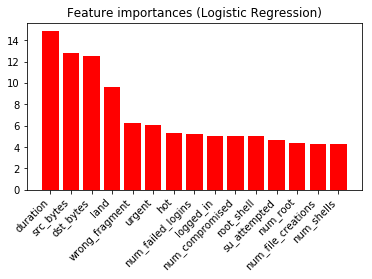

In [271]:
coefs = np.abs(LR.coef_[0])
indices = np.argsort(coefs)[::-1]

plt.figure()
plt.title("Feature importances (Logistic Regression)")
plt.bar(range(15), coefs[indices[:15]],color="r", align="center")
plt.xticks(range(15), train.columns, rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)

### RANDOM FOREST

In [272]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
predictions = RF.predict(X_test)

print("\n Classification Report (Random Forest) \n")
print(classification_report(y_test,predictions))
print("\n Confusion Matrix ( Random Forest ) \n")
print(confusion_matrix(y_test,predictions))


 Classification Report (Random Forest) 

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     13486
          1       1.00      1.00      1.00     11709

avg / total       1.00      1.00      1.00     25195


 Confusion Matrix ( Random Forest ) 

[[13481     5]
 [    8 11701]]


## LGBM 

In [273]:
lgbmc = LGBMClassifier()
lgbmc.fit(X_train,y_train)
predictions = lgbmc.predict(X_test)
print("\n Classification Report (LGBM) \n")
print(classification_report(y_test,predictions))
print("\n Confusion Matrix ( LGBM ) \n")
print(confusion_matrix(y_test,predictions))


 Classification Report (LGBM) 

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     13486
          1       1.00      1.00      1.00     11709

avg / total       1.00      1.00      1.00     25195


 Confusion Matrix ( LGBM ) 

[[13481     5]
 [    5 11704]]


C:\Users\satish\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## XGB

In [274]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
predictions = xgb.predict(X_test)

print("\n Classification Report (XGB) \n")
print(classification_report(y_test,predictions))
print("\n Confusion Matrix ( XGB ) \n")
print(confusion_matrix(y_test,predictions))


 Classification Report (XGB) 

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     13486
          1       1.00      1.00      1.00     11709

avg / total       1.00      1.00      1.00     25195


 Confusion Matrix ( XGB ) 

[[13454    32]
 [   17 11692]]


C:\Users\satish\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [275]:
# model perfomance comparison

In [276]:
test.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,-0.155538,-0.021989,-0.096898,-0.017624,-0.059105,-0.01946,-0.113524,-0.144002,-0.890408,-0.016494,...,1,0,0,0,0,0,0,0,0,0
1,-0.154116,0.005472,-0.096898,-0.017624,-0.059105,-0.01946,-0.113524,-0.144002,-0.890408,-0.016494,...,0,0,0,0,0,0,0,0,1,0
2,-0.155538,-0.021946,-0.096898,-0.017624,-0.059105,-0.01946,-0.113524,-0.144002,-0.890408,-0.016494,...,0,0,0,0,0,0,0,0,1,0
3,-0.154827,-0.021989,-0.096191,-0.017624,-0.059105,-0.01946,-0.113524,-0.144002,-0.890408,-0.016494,...,0,1,0,0,0,0,0,0,0,0
4,-0.155538,-0.021424,0.587149,-0.017624,-0.059105,-0.01946,-0.113524,-0.144002,1.123081,-0.016494,...,0,0,0,0,0,0,0,0,1,0


# TEST DATA SET - TARGET [attack - variable to predict]

In [277]:
#[TEST DATA] - prediction for target variable (using Logistic regeression)
test['attack']=LR.predict(test)

In [278]:
test.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,attack
0,-0.155538,-0.021989,-0.096898,-0.017624,-0.059105,-0.01946,-0.113524,-0.144002,-0.890408,-0.016494,...,0,0,0,0,0,0,0,0,0,1
1,-0.154116,0.005472,-0.096898,-0.017624,-0.059105,-0.01946,-0.113524,-0.144002,-0.890408,-0.016494,...,0,0,0,0,0,0,0,1,0,0
2,-0.155538,-0.021946,-0.096898,-0.017624,-0.059105,-0.01946,-0.113524,-0.144002,-0.890408,-0.016494,...,0,0,0,0,0,0,0,1,0,1
3,-0.154827,-0.021989,-0.096191,-0.017624,-0.059105,-0.01946,-0.113524,-0.144002,-0.890408,-0.016494,...,1,0,0,0,0,0,0,0,0,0
4,-0.155538,-0.021424,0.587149,-0.017624,-0.059105,-0.01946,-0.113524,-0.144002,1.123081,-0.016494,...,0,0,0,0,0,0,0,1,0,0


In [279]:
test.attack.value_counts()

0    13310
1     9233
Name: attack, dtype: int64

In [280]:
test['attack']=test['attack'].apply(lambda x: 'normal' if x==0 else 'attack')

In [281]:
test.attack.value_counts()

normal    13310
attack     9233
Name: attack, dtype: int64

In [282]:
# [TEST DATA SET] file preparation after predicting target - Lable - "attack"
#test.to_csv('test_ds_generation.csv')